In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble

In [7]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')

In [8]:
data = data.rename(columns={'0':'Sentiment',
                     '1467810369': 'Tweet ID',
                     'Mon Apr 06 22:19:45 PDT 2009':'Date',
                     'NO_QUERY':'Query',
                     '_TheSpecialOne_':'Username',
                     "@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'Tweet'})

In [9]:
def Sentiment_remap(x):
    if x == 0:
        return 0
    else:
        return 1

In [10]:
data['Sentiment'] = data['Sentiment'].apply(Sentiment_remap)

In [11]:
def username_removal(string):
    
    for i in range(string.count('@')): 
        username_begin_index = string.find('@')
        username_end_index = string[username_begin_index::].find(' ') + username_begin_index
    
        string = string.replace(string[username_begin_index:username_end_index+1],' ')
    
    return string                    

In [12]:
data['Tweet'] = data['Tweet'].apply(username_removal)

In [13]:
x = data['Tweet']
y = data['Sentiment']

In [14]:
tweet_count_vectorizer = CountVectorizer()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.66, stratify=y, random_state=7)

In [16]:
tweet_count_vectorizer.fit(x_train)

CountVectorizer()

In [17]:
x_train_vectorized = tweet_count_vectorizer.transform(x_train)
x_test_vectorized = tweet_count_vectorizer.transform(x_test)

# MODEL 1 - Slucajne sume



In [17]:
accs1 = []
for i in range(4,25, 4):

    model1 = ensemble.RandomForestClassifier(n_estimators=20, max_depth=i, random_state=7)
    model1.fit(x_train_vectorized, y_train)
    y_predicted1 = model1.predict(x_test_vectorized)
    accs1.append(accuracy_score(y_test, y_predicted1))
    

<BarContainer object of 6 artists>

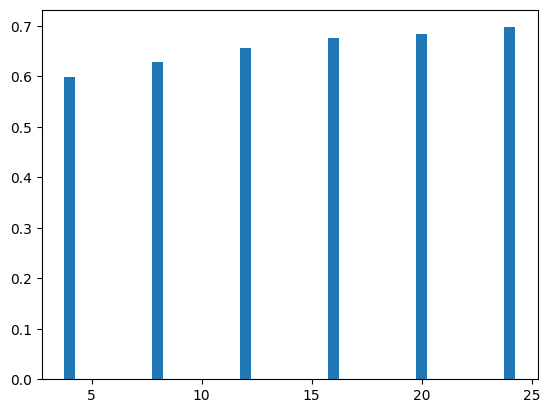

In [18]:
plt.bar(range(4, 25, 4), accs1, width=0.5)

In [20]:
print(classification_report(y_test, y_predicted1))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69    272000
           1       0.69      0.73      0.71    272000

    accuracy                           0.70    544000
   macro avg       0.70      0.70      0.70    544000
weighted avg       0.70      0.70      0.70    544000



In [21]:
#nsto nesto

# MODEL 2 - Prosta agregacija



In [22]:
accs2 = []
for i in range(4,25, 4):
    model2 = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=10 ,random_state=42), n_estimators=i*3, max_samples=i, bootstrap=True, random_state=7)
    model2.fit(x_train_vectorized, y_train)
    y_predicted2 = model2.predict(x_test_vectorized)
    accs2.append(accuracy_score(y_test, y_predicted2))


<BarContainer object of 6 artists>

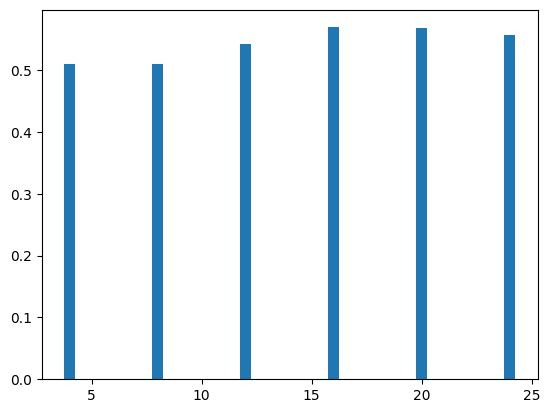

In [23]:
plt.bar(range(4, 25, 4), accs2, width=0.5)

In [24]:
accs2

[0.5098253676470588,
 0.5099522058823529,
 0.5419705882352941,
 0.5692518382352941,
 0.5674540441176471,
 0.55715625]

# MODEL 3 - Pojacavanje (XG Boost)



In [18]:
import xgboost

In [ ]:
accs3 = []
for i in range(4,16, 4):
    model3= xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=10, max_depth=i)
    model3.fit(x_train_vectorized, y_train)
    y_predicted3 = model3.predict(x_test_vectorized)
    #accs3.append(accuracy_score(y_test, y_predicted3))

In [ ]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_predicted3)

In [ ]:
plt.bar(range(4, 25, 4), accs3, width=0.5)

In [ ]:
pip install graphviz 


In [ ]:
plt.figure(figsize=(20, 15), dpi=180)
ax = plt.subplot(1, 1, 1)
xgboost.plot_tree(model3, num_trees=20, ax=ax, rankdir='LR')
plt.show()